<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation using the excel data

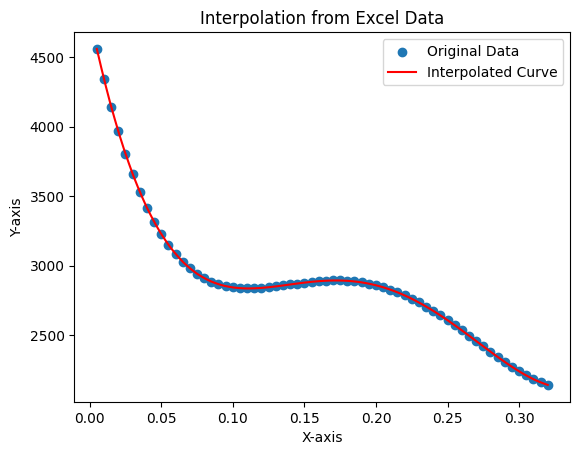

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain2']
y = df['Hardening2']

# Create an interpolation function (linear interpolation in this example)
interp_func = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = interp_func(x_new)

# Plot the original data and interpolated curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation from Excel Data')
plt.show()


#interp1d Interpolation


Cubic Polynomial Coefficients: [-431996.46665817  226270.1897492   -39288.5660006     4765.84361717]
Cubic Polynomial Equation: -431996.466658 x^3 + 226270.189749 x^2 + -39288.566001 x + 4765.843617


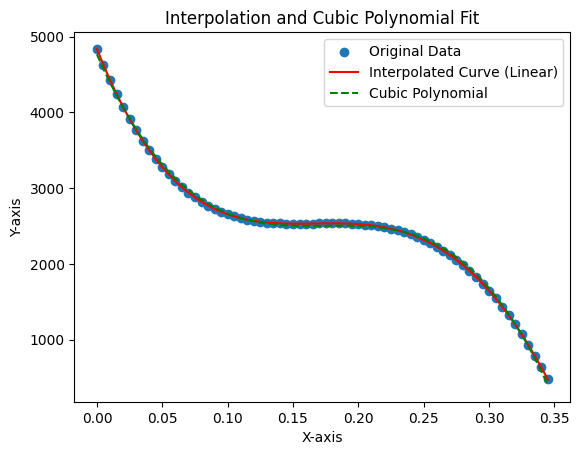

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)
# print(df)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Perform cubic spline interpolation
spline_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, 3)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Print the cubic polynomial equation
cubic_equation = f"{coefficients[0]:.6f} x^3 + {coefficients[1]:.6f} x^2 + {coefficients[2]:.6f} x + {coefficients[3]:.6f}"
print("Cubic Polynomial Equation:", cubic_equation)

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve (Linear)', color='red')
plt.plot(x_new, y_cubic, label='Cubic Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Cubic Polynomial Fit')
plt.show()


# make_interp_spline Interpolation

Polynomial Coefficients: [ 4.44086486e+00  3.90926112e+05 -7.01736956e+05  2.85812859e+05
 -4.37778307e+04  4.83826340e+03]
Polynomial Equation: 4.440865 x^5 + 390926.111720 x^4 + -701736.956076 x^3 + 285812.858587 x^2 + -43777.830734 x^1 + 4838.263398


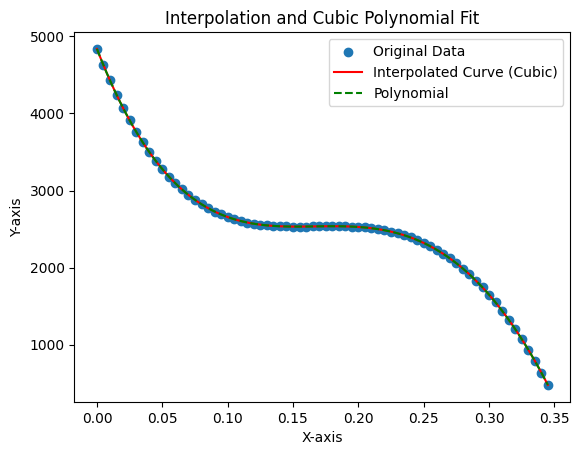

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, make_interp_spline  # Import both interp1d and make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=5)  # Use make_interp_spline here

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, 5)

# Print the coefficients
print("Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve (Cubic)', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Cubic Polynomial Fit')
plt.show()


# Interpolation + Equation + Derivative + Beta0

Cubic Polynomial Coefficients: [ 4.44086486e+00  3.90926112e+05 -7.01736956e+05  2.85812859e+05
 -4.37778307e+04  4.83826340e+03]

Polynomial Equation: 4.440865 x^5 + 390926.111720 x^4 + -701736.956076 x^3 + 285812.858587 x^2 + -43777.830734 x^1 + 4838.263398

Derivative Equation: 22.204324 x^4 + 1563704.446879 x^3 + -2105210.868229 x^2 + 571625.717175 x^1 + -43777.830734

Roots (Zeros) of the Derivative Equation: [-7.04247659e+04  1.01256631e+00  1.80725415e-01  1.52984897e-01]

For x = -70424.765859, y = 1923306333548045752336384.000000
For x = 1.012566, y = -64019.656439
For x = 0.180725, y = 2536.449325
For x = 0.152985, y = 2531.744120



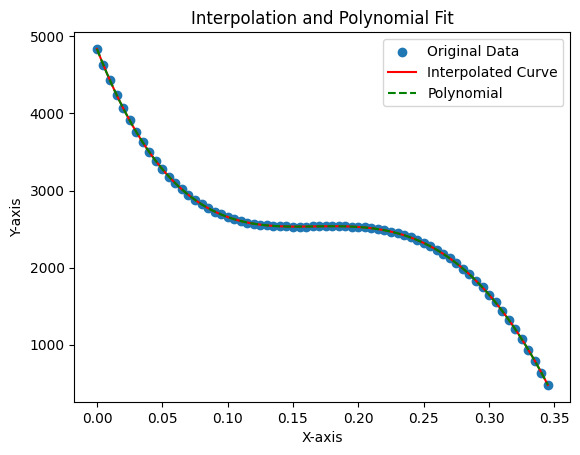

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{4-i} + " if i < 4 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


# Considering a part of graph

Cubic Polynomial Coefficients: [-662618.49261847  284588.36829837  -43765.53442113    4838.24541259]
Cubic Polynomial Equation: -662618.492618 x^3 + 284588.368298 x^2 + -43765.534421 x + 4838.245413


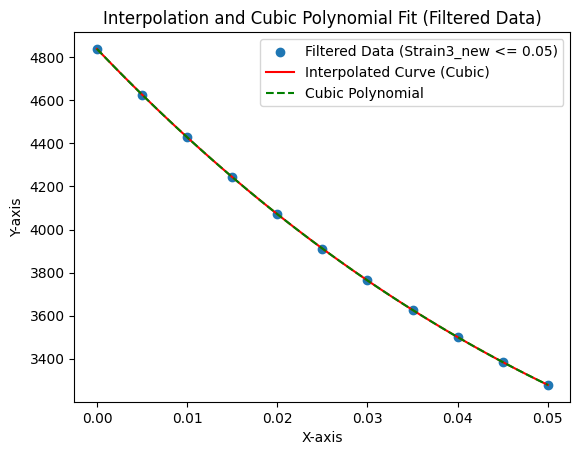

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Apply condition to filter data where Strain3_new <= 0.05
condition = x <= 0.05
x = x[condition]
y = y[condition]

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=5)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the filtered dataset
coefficients = np.polyfit(x, y, 3)  # Changed to a cubic polynomial (degree 3) for consistency with the plotted curve

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Print the cubic polynomial equation
cubic_equation = f"{coefficients[0]:.6f} x^3 + {coefficients[1]:.6f} x^2 + {coefficients[2]:.6f} x + {coefficients[3]:.6f}"
print("Cubic Polynomial Equation:", cubic_equation)

# Plot the original filtered data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Filtered Data (Strain3_new <= 0.05)')
plt.plot(x_new, y_new, label='Interpolated Curve (Cubic)', color='red')
plt.plot(x_new, y_cubic, label='Cubic Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Cubic Polynomial Fit (Filtered Data)')
plt.show()


#Linear interpolation

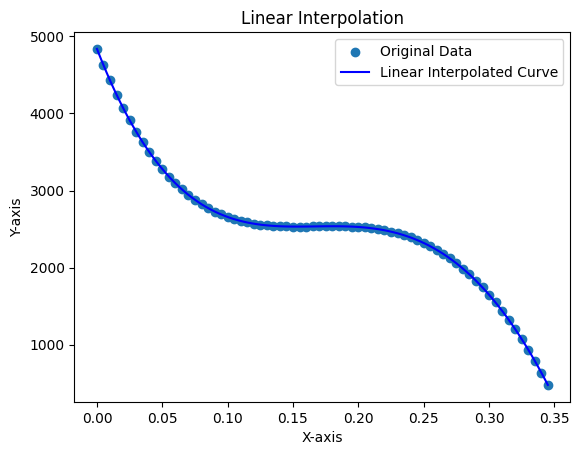

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Perform linear interpolation
linear_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = linear_interp(x_new)

# Plot the original data and linearly interpolated curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Linear Interpolated Curve', color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Linear Interpolation')
plt.show()


Cubic Polynomial Coefficients: [ 4.44086486e+00  3.90926112e+05 -7.01736956e+05  2.85812859e+05
 -4.37778307e+04  4.83826340e+03]


Polynomial Equation: 4.440865 x^5 + 390926.111720 x^4 + -701736.956076 x^3 + 285812.858587 x^2 + -43777.830734 x^1 + 4838.263398

Derivative Equation: 22.204324 x^4 + 1563704.446879 x^3 + -2105210.868229 x^2 + 571625.717175 x^1 + -43777.830734

Roots (Zeros) of the Polynomial Equation (where y = 0): [-8.80310695e+04+0.j          1.28971697e+00+0.j
  3.58549899e-01+0.j          7.33838601e-02+0.14621303j
  7.33838601e-02-0.14621303j]

For x = -88031.069512+0.000000j, y = 2183117101.825639+0.000000j
For x = 1.289717+0.000000j, y = -0.000000+0.000000j
For x = 0.358550+0.000000j, y = -0.000000+0.000000j
For x = 0.073384+0.146213j, y = -0.000000-0.000000j
For x = 0.073384-0.146213j, y = -0.000000+0.000000j

For Îµi = -44015.534756, y = 733694361381590041362432.000000
For Îµi = 0.644858, y = -25115.203630
For Îµi = 0.179275, y = 2536.412648



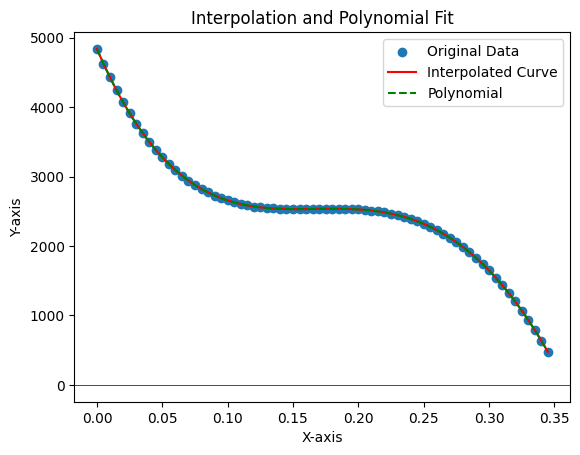

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)
print()

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{4-i} + " if i < 4 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the polynomial equation when y=0
roots = np.roots(coefficients)
print("Roots (Zeros) of the Polynomial Equation (where y = 0):", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Filter out complex roots and consider only real part, dividing it by two
real_roots = [root.real / 2 for root in roots if np.isreal(root)]

# Print the corresponding y values for the real roots
for root in real_roots:
    y_root = np.polyval(coefficients, root)
    print(f"For εi = {root:.6f}, y = {y_root:.6f}".encode('utf-8').decode('cp1252'))
print()



# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.axhline(0, color='black', linewidth=0.5)  # Add x-axis
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()

Cubic Polynomial Coefficients: [ 4.44086486e+00  3.90926112e+05 -7.01736956e+05  2.85812859e+05
 -4.37778307e+04  4.83826340e+03]

Polynomial Equation: 4.440865 x^5 + 390926.111720 x^4 + -701736.956076 x^3 + 285812.858587 x^2 + -43777.830734 x^1 + 4838.263398

Derivative Equation: 22.204324 x^4 + 1563704.446879 x^3 + -2105210.868229 x^2 + 571625.717175 x^1 + -43777.830734

Roots (Zeros) of the Derivative Equation: [-7.04247659e+04  1.01256631e+00  1.80725415e-01  1.52984897e-01]

For x = -70424.765859, y = 1923306333548045752336384.000000
For x = 1.012566, y = -64019.656439
For x = 0.180725, y = 2536.449325
For x = 0.152985, y = 2531.744120

Data point with the highest y value:
X value: 0.0
Y value: 4838.263
Slope between (0.000000, 4838.263000) and (-70424.765859, 1923306333548045752336384.000000): -27310084884213252096.000000
Slope between (0.000000, 4838.263000) and (1.012566, -64019.656439): -68003.368083
Slope between (0.000000, 4838.263000) and (0.180725, 2536.449325): -12736.524

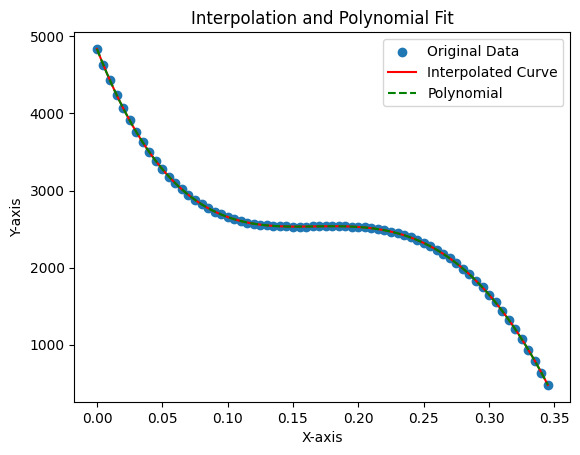

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{4-i} + " if i < 4 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Find the row with the maximum y value
max_y_row = df.loc[df['Hardening3'].idxmax()]

# Extract x and y values from the row with the maximum y value
max_y_x = max_y_row['Strain3']
max_y = max_y_row['Hardening3']

print("Data point with the highest y value:")
print("X value:", max_y_x)
print("Y value:", max_y)

# Coordinates of the point with the highest y value
x1 = max_y_x
y1 = max_y

# Loop through each pair of y_roots and their corresponding x values
for i in range(len(roots) - 1):
    y2 = y_roots[i]
    x2 = roots[i]

    # Calculate the slope using the formula (y2 - y1) / (x2 - x1)
    slope = (y2 - y1) / (x2 - x1)
    print(f"Slope between ({x1:.6f}, {y1:.6f}) and ({x2:.6f}, {y2:.6f}): {slope:.6f}")


# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


Cubic Polynomial Coefficients: [ 4.44086486e+00  3.90926112e+05 -7.01736956e+05  2.85812859e+05
 -4.37778307e+04  4.83826340e+03]

Polynomial Equation: 4.440865 x^5 + 390926.111720 x^4 + -701736.956076 x^3 + 285812.858587 x^2 + -43777.830734 x^1 + 4838.263398

Derivative Equation: 22.204324 x^4 + 1563704.446879 x^3 + -2105210.868229 x^2 + 571625.717175 x^1 + -43777.830734

Roots (Zeros) of the Derivative Equation: [-7.04247659e+04  1.01256631e+00  1.80725415e-01  1.52984897e-01]

For x = -70424.765859, y = 1923306333548045752336384.000000
For x = 1.012566, y = -64019.656439
For x = 0.180725, y = 2536.449325
For x = 0.152985, y = 2531.744120

Data point with the highest y value:
X value: 0.0
Y value: 4838.263
Slope: -20491.054545454546


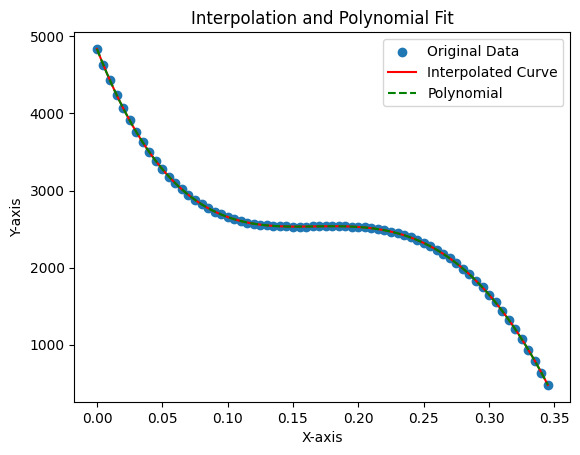

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{4-i} + " if i < 4 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Find the row with the maximum y value
max_y_row = df.loc[df['Hardening3'].idxmax()]

# Extract x and y values from the row with the maximum y value
max_y_x = max_y_row['Strain3']
max_y = max_y_row['Hardening3']

print("Data point with the highest y value:")
print("X value:", max_y_x)
print("Y value:", max_y)

# Coordinates of the point with the highest y value
x1 = max_y_x
y1 = max_y

# Loop through each pair of y_roots and their corresponding x values
# for i in range(len(roots) - 1):
#     y2 = y_roots[i]
#     x2 = roots[i]

#     # Calculate the slope using the formula (y2 - y1) / (x2 - x1)
#     slope = (y2 - y1) / (x2 - x1)
#     print(f"Slope between ({x1:.6f}, {y1:.6f}) and ({x2:.6f}, {y2:.6f}): {slope:.6f}")

x2 = 0.11
y2 = 2584.247

slope = (y2 - y1) / (x2 - x1)
print("Slope:",slope)


# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


# Try Plot Digitization

In [ ]:
pip install plotdigitizer

In [ ]:
!pip install plotdigitizer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from plot_digitizer import PlotDigitizer

# Load the image of the graph
image_path = '/content/1.png'
img = plt.imread(image_path)

# Display the image
plt.imshow(img)
plt.title('Image of the graph')
plt.show()

# Initialize PlotDigitizer with the image
plot_digitizer = PlotDigitizer(img)

# Use PlotDigitizer to extract data points for the red curve only
data_points_red = plot_digitizer.get_points(color='red')

# Convert data points to numpy array
data_points_red = np.array(data_points_red)

# Plot the extracted data points for the red curve
plt.scatter(data_points_red[:, 0], data_points_red[:, 1], color='red', label='Red Curve Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Extracted Data Points for Red Curve from Image')
plt.legend()
plt.show()

# Now you can use the extracted data points for further analysis or plotting


ModuleNotFoundError: No module named 'plot_digitizer'

In [ ]:
!pip install plotdigitizer


In [ ]:

from google.colab.patches import cv2_imshow
import cv2

# Assuming you have already processed the image and stored
import cv2

# Load the image
image = cv2.imread('/content/1.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform edge detection
edges = cv2.Canny(blurred_image, 50, 150)

# Display the processed image
cv2.imshow('Processed Image', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('/content/1.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range of red color in HSV
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Threshold the HSV image to get only red colors
mask = cv2.inRange(hsv_image, lower_red, upper_red)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize an empty list to store the (x, y) points of the red curve
red_curve_points = []

# Loop through all detected contours
for contour in contours:
    # Approximate the contour to reduce the number of points
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the contour has enough points, consider it as part of the curve
    if len(approx) > 50:  # You may need to adjust this threshold based on your image
        # Extract (x, y) coordinates of the curve
        for point in approx:
            x, y = point[0]
            red_curve_points.append((x, y))

# Print the extracted (x, y) points of the red curve
print("Red curve points:")
for point in red_curve_points:
    print(point)


Red curve points:


In [ ]:
pip install matplotlib opencv-python


In [ ]:
# prompt: python version

!python --version


Python 3.10.12


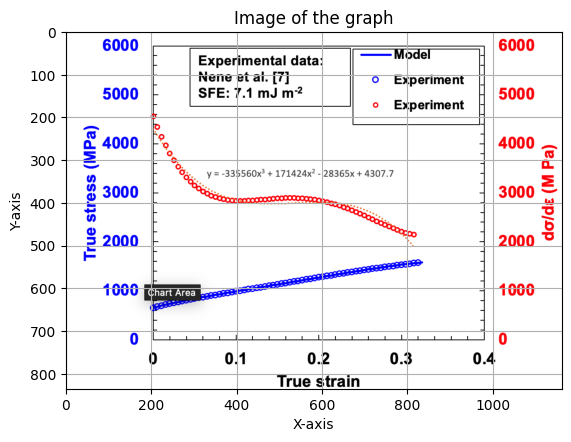

Click on the curve to select data points. Close the plot when finished.


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def select_points(image):
    # Display the image
    plt.imshow(image)
    plt.title('Image of the graph')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

    # Select data points manually
    print("Click on the curve to select data points. Close the plot when finished.")
    points = plt.ginput(-1, timeout=0)

    # Convert points to numpy array
    points = np.array(points)

    return points

# Load the image of the graph
image_path = '/content/1.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Select data points
data_points_red = select_points(image_rgb)

# Plot the extracted data points for the red curve
plt.scatter(data_points_red[:, 0], data_points_red[:, 1], color='red', label='Red Curve Data Points')
plt.title('Extracted Data Points for Red Curve from Image')
plt.legend()
plt.show()

# Now you can use the extracted data points for further analysis or plotting


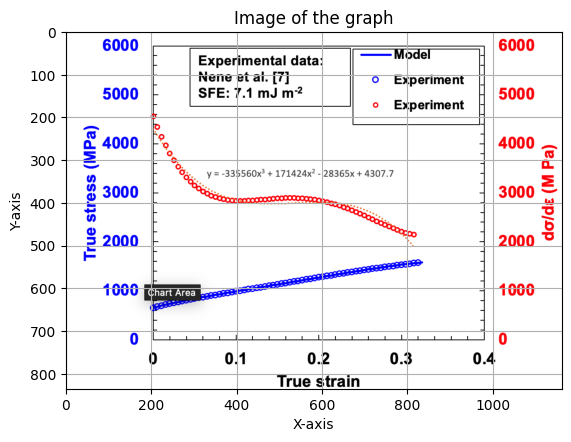

Click on the curve to select data points. Close the plot when finished.


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def select_points(image):
    # Display the image
    plt.imshow(image)
    plt.title('Image of the graph')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

    # Select data points manually
    print("Click on the curve to select data points. Close the plot when finished.")
    points = plt.ginput(-1, timeout=0)

    # Convert points to numpy array
    points = np.array(points)

    return points

# Load the image of the graph
image_path = '/content/1.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Select data points
data_points_red = select_points(image_rgb)

# Print the data points
print("Data points:")
for i, (x, y) in enumerate(data_points_red):
    print(f"Point {i + 1}: ({x}, {y})")

# Plot the extracted data points for the red curve
plt.scatter(data_points_red[:, 0], data_points_red[:, 1], color='red', label='Red Curve Data Points')
plt.title('Extracted Data Points for Red Curve from Image')
plt.legend()
plt.show()

# Now you can use the extracted data points for further analysis or plotting


#Generate Data Points using curve image

In [ ]:
!pip install plotdigitizer


In [ ]:
!plotdigitizer '/content/3.png' -p   0,0 -p   0.35,0 -p   0,5000 --output output.csv


INFO:root:Extracting trajectories from /content/3.png
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data_points = pd.read_csv('output.csv')

# Print the data points
for index, row in data_points.iterrows():
    print(f"Data point {index}: X={row['x']}, Y={row['y']}")


FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

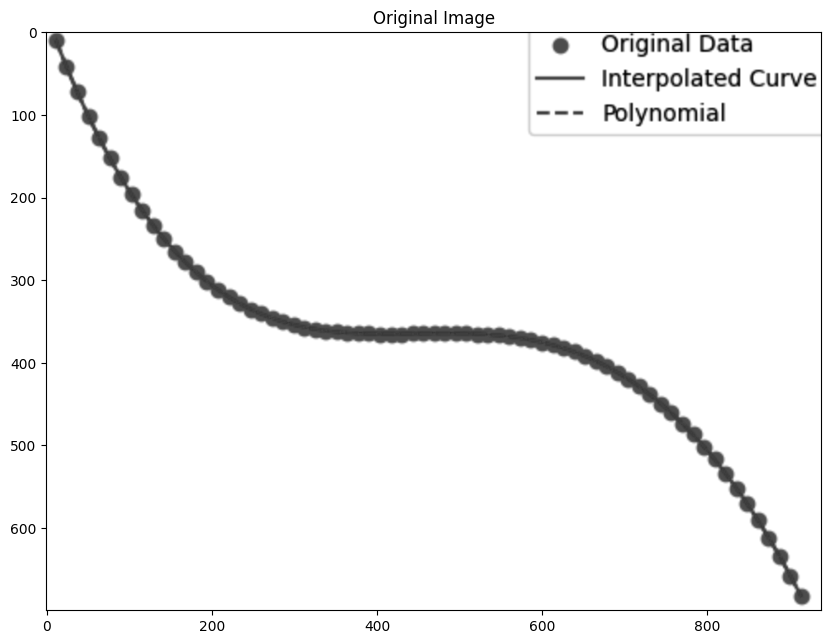

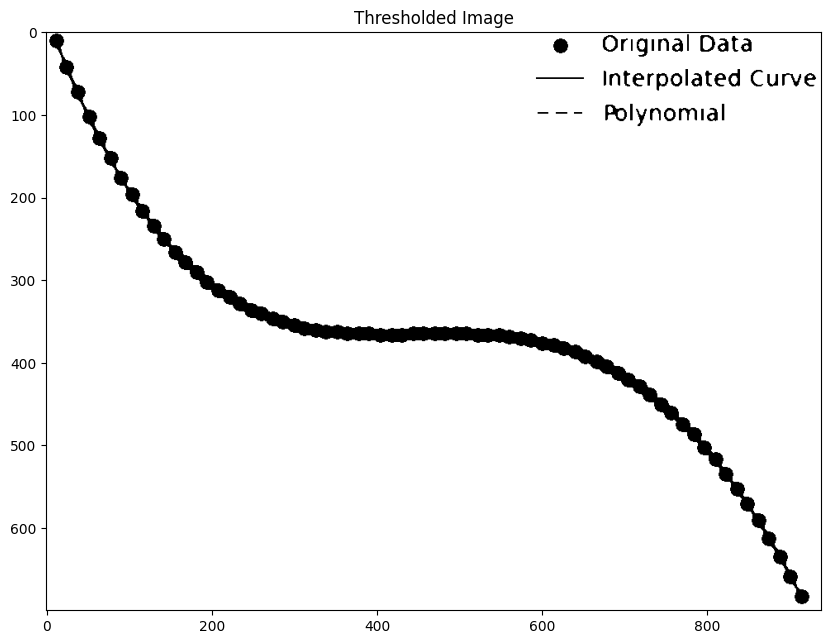

Data point: X=0, Y=0
Data point: X=0, Y=699
Data point: X=937, Y=699
Data point: X=937, Y=0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/3.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5,   5),   0)

# Apply thresholding to isolate the curve
_, thresh = cv2.threshold(blurred,   127,   255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize an empty list to store the data points
data_points = []

# Loop over the contours
for contour in contours:
    # Approximate the contour to a polygon
    epsilon =   0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Extract the vertices of the polygon as data points
    for point in approx:
        data_points.append((point[0][0], point[0][1]))

# Display the original image
plt.figure(figsize=(10,  10))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Display the thresholded image
plt.figure(figsize=(10,  10))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.show()

# Print the data points
for point in data_points:
    print(f"Data point: X={point[0]}, Y={point[1]}")


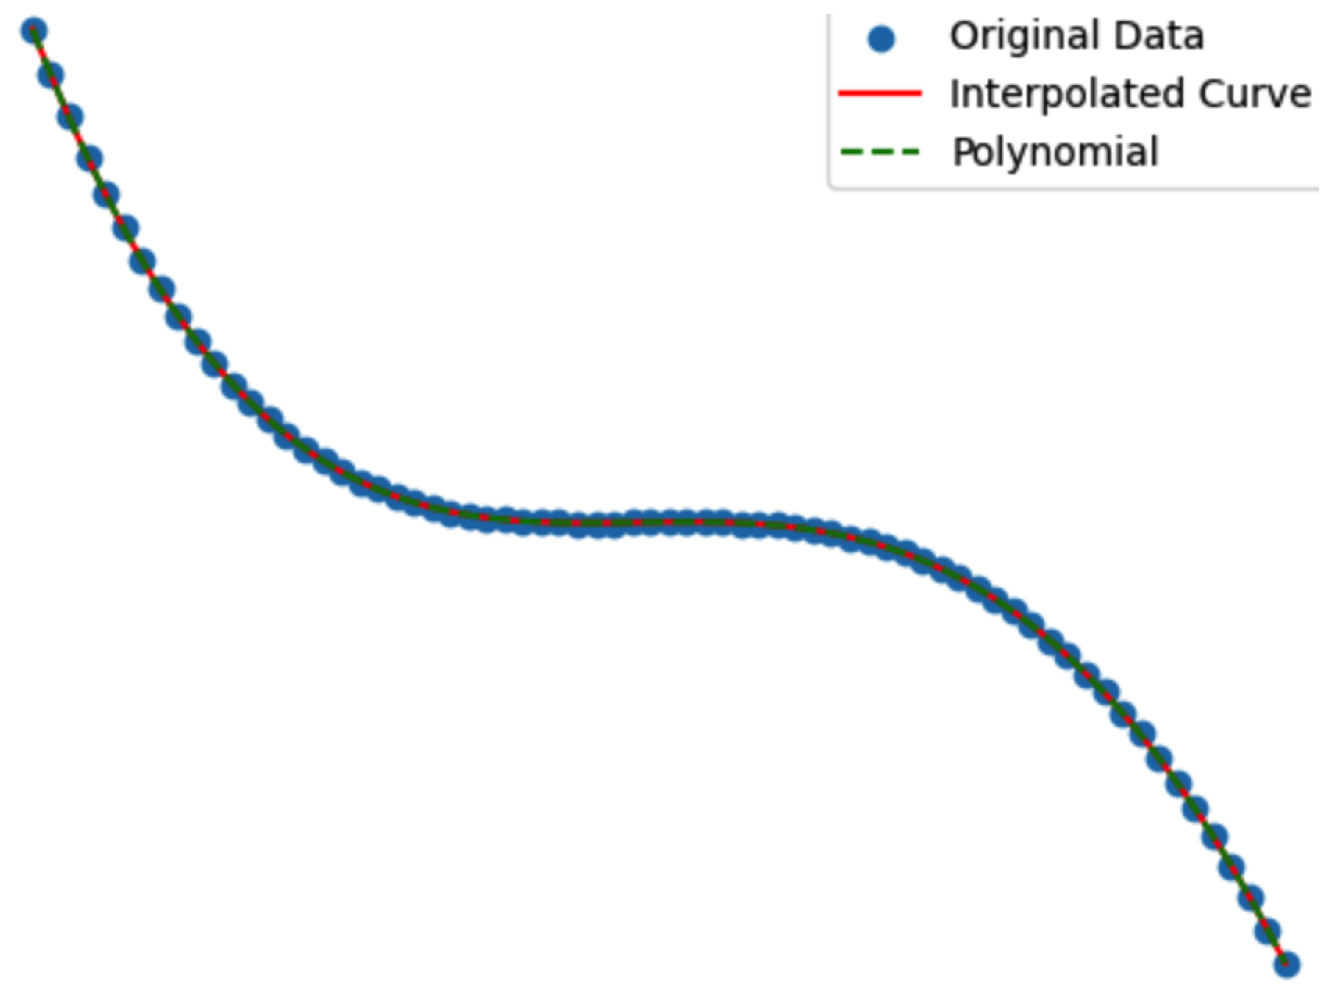

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the image path
image_path = '/content/3.png'

# Load the image
image = mpimg.imread(image_path)

# Create a figure and axes
fig, ax = plt.subplots()

# Set the x and y axis limits
ax.set_xlim([0,  0.35])
ax.set_ylim([0,  5000])

# Place the image at the center of the axes
imagebox = OffsetImage(image, zoom=1)
ab = AnnotationBbox(imagebox, (0.175,  2500), frameon=False)
ax.add_artist(ab)

# Show the plot
plt.show()


Curve 1: [(689, 102), (689, 104), (690, 105), (690, 106), (692, 108), (694, 108), (693, 108), (689, 104)]
Curve 2: [(804, 101), (803, 102), (803, 105), (804, 106), (807, 106), (809, 104), (809, 101), (808, 101), (809, 102), (809, 103), (806, 106), (805, 106), (803, 104), (803, 103), (805, 101)]
Curve 3: [(685, 100), (688, 100)]
Curve 4: [(640, 96), (639, 97), (638, 97), (638, 100), (649, 100), (649, 97), (648, 97), (647, 96)]
Curve 5: [(618, 96), (617, 97), (616, 97), (616, 100), (630, 100), (630, 97), (629, 97), (628, 96)]
Curve 6: [(596, 96), (595, 97), (594, 97), (594, 100), (608, 100), (608, 97), (607, 97), (606, 96)]
Curve 7: [(806, 95), (807, 95), (809, 97), (808, 98), (804, 98), (803, 99), (802, 99), (800, 101), (800, 102), (799, 103), (799, 105), (800, 106), (800, 107), (801, 108), (804, 108), (802, 108), (799, 105), (799, 103), (804, 98), (809, 98), (809, 96), (808, 96), (807, 95)]
Curve 8: [(753, 95), (751, 97), (751, 98), (750, 99), (750, 102), (751, 103), (751, 104), (753, 

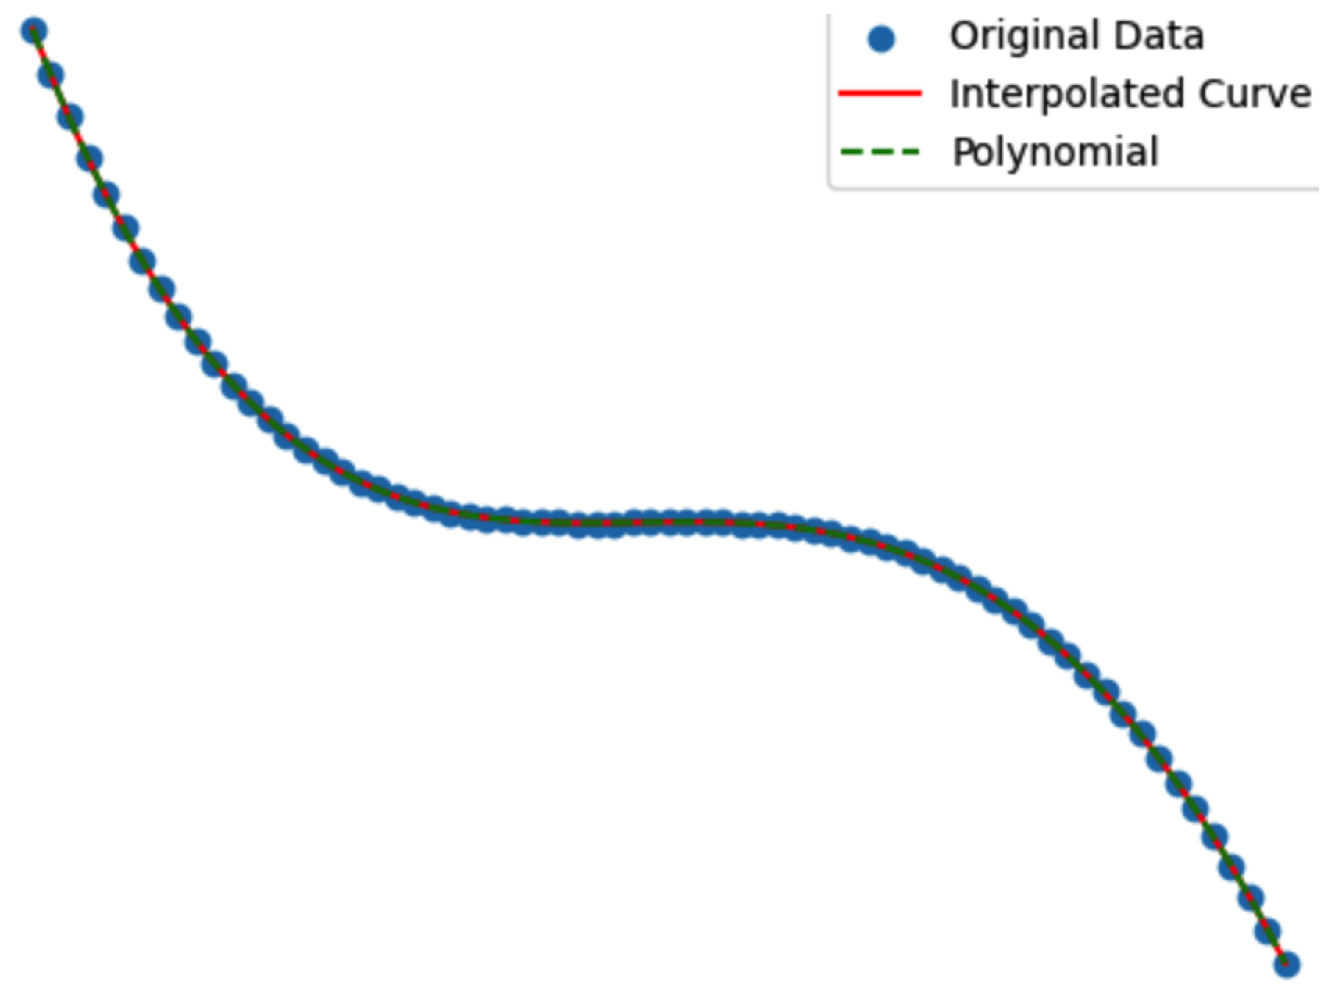

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step   1: Preprocess the Image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path,   0)

    # Threshold the image
    _, thresh = cv2.threshold(img,   127,   255, cv2.THRESH_BINARY)

    # Perform edge detection
    edges = cv2.Canny(thresh,   50,   150)

    return edges

# Step   2: Detect and Extract Curves
def extract_curves(edges):
    # Find contours in the image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract curves from the contours
    curves = []
    for contour in contours:
        curve = []
        for point in contour:
            x, y = point[0]
            curve.append((x, y))
        curves.append(curve)

    return curves

# Step   3: Analyze Curve Data and Plot
def analyze_curve_data_and_plot(curves):
    # Output the curve values
    for i, curve in enumerate(curves):
        print(f"Curve {i+1}: {curve}")

    # Plot the curves
    fig, ax = plt.subplots()
    ax.set_xlim([0,   0.35])
    ax.set_ylim([0,   5000])

    for curve in curves:
        x, y = zip(*curve)
        ax.plot(x, y)

    # Place the image at the center of the axes
    imagebox = OffsetImage(image, zoom=1)
    ab = AnnotationBbox(imagebox, (0.175,   2500), frameon=False)
    ax.add_artist(ab)

    # Show the plot
    plt.show()

# Main function to run the pipeline
def main():
    image_path = '/content/3.png'
    edges = preprocess_image(image_path)
    curves = extract_curves(edges)
    analyze_curve_data_and_plot(curves)

if __name__ == "__main__":
    main()


In [ ]:
import cv2
import numpy as np

def preprocess_image(image):
    if image is None:
        raise ValueError("Image is empty or could not be loaded.")
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Perform edge detection
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def detect_curve(image):
    # Find contours in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Sort contours based on their area
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    # Extract the largest contour (presumably the curve)
    curve_contour = contours[0]
    return curve_contour

def extract_data_points(curve_contour, x_start, x_end, y_start, y_end):
    data_points = []
    # Iterate through points in the contour
    for point in curve_contour:
        x, y = point[0]
        # Map pixel coordinates to actual data points
        x_mapped = x_start + (x / image.shape[1]) * (x_end - x_start)
        y_mapped = y_start + (y / image.shape[0]) * (y_end - y_start)
        data_points.append((x_mapped, y_mapped))
    return data_points

try:
    # Load the image
    image = cv2.imread('content/3.png')

    # Define the starting and ending x and y axis values
    x_start = 0
    x_end = 0.35
    y_start = 0
    y_end = 7000

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Detect the curve in the image
    curve_contour = detect_curve(processed_image)

    # Extract data points from the curve
    data_points = extract_data_points(curve_contour, x_start, x_end, y_start, y_end)

    # Print the data points
    for point in data_points:
        print("X:", point[0], "Y:", point[1])

    # Optionally, visualize the detected curve and data points
    cv2.drawContours(image, [curve_contour], -1, (0, 255, 0), 2)
    for point in curve_contour:
        cv2.circle(image, tuple(point[0]), 2, (0, 0, 255), -1)
    cv2.imshow('Detected Curve', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

except ValueError as e:
    print("Error:", e)


Error: Image is empty or could not be loaded.


In [ ]:
import cv2
import numpy as np

# Load the image
image_path = 'content/3.png'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load the image from '{image_path}'")
    exit()

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for red color in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Threshold the HSV image to extract red pixels
mask = cv2.inRange(hsv, lower_red, upper_red)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour
for contour in contours:
    # Convert contour to array and reshape it to 2D
    contour_array = contour.squeeze()

    # Print the data points
    for point in contour_array:
        x, y = point
        print(f"X: {x}, Y: {y}")

# Display the image (for visualization, optional)
cv2.imshow('Curve Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Error: Unable to load the image from 'content/3.png'


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# prompt: Plot digitizstion

!plotdigitizer '/content/2.png' -p   0,0 -p   0.35,0 -p   0,5000 --output output.csv
